In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

# Read File

In [ ]:
!gdown 1mc89F1dkQ6XRQnwQTqqryjaXt5ZWXTT0
!unzip BTC-Daily.zip

Downloading...
From: https://drive.google.com/uc?id=1mc89F1dkQ6XRQnwQTqqryjaXt5ZWXTT0
To: /content/BTC-Daily.zip
100% 95.7k/95.7k [00:00<00:00, 26.8MB/s]
Archive:  BTC-Daily.zip
  inflating: BTC-Daily.csv           


In [ ]:
df = pd.read_csv("../content/BTC-Daily.csv")
df = df.drop_duplicates()

In [ ]:
df.head()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1646092800,2022-03-01 00:00:00,BTC/USD,43221.71,43626.49,43185.48,43185.48,49.006289,2.116360e+06
1,1646006400,2022-02-28 00:00:00,BTC/USD,37717.10,44256.08,37468.99,43178.98,3160.618070,1.364723e+08
2,1645920000,2022-02-27 00:00:00,BTC/USD,39146.66,39886.92,37015.74,37712.68,1701.817043,6.418008e+07
3,1645833600,2022-02-26 00:00:00,BTC/USD,39242.64,40330.99,38600.00,39146.66,912.724087,3.573010e+07
4,1645747200,2022-02-25 00:00:00,BTC/USD,38360.93,39727.97,38027.61,39231.64,2202.851827,8.642149e+07


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2651 entries, 0 to 2650
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   unix        2651 non-null   int64  
 1   date        2651 non-null   object 
 2   symbol      2651 non-null   object 
 3   open        2651 non-null   float64
 4   high        2651 non-null   float64
 5   low         2651 non-null   float64
 6   close       2651 non-null   float64
 7   Volume BTC  2651 non-null   float64
 8   Volume USD  2651 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 186.5+ KB


## Range of dates covered

In [ ]:
# Range of dates covered
df["date"] = pd.to_datetime(df["date"])
date_range = str(df["date"].dt.date.min()) + " to " +str(df["date"].dt.date.max())
print(date_range)

2014-11-28 to 2022-03-01


## Visualizations of Daily Closing Price using line plot (Optional)

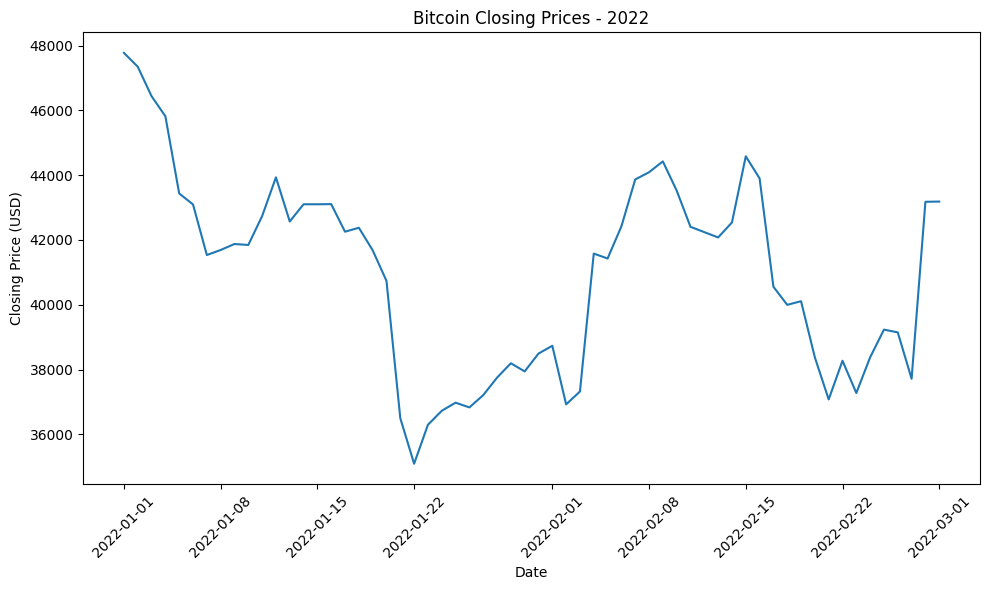

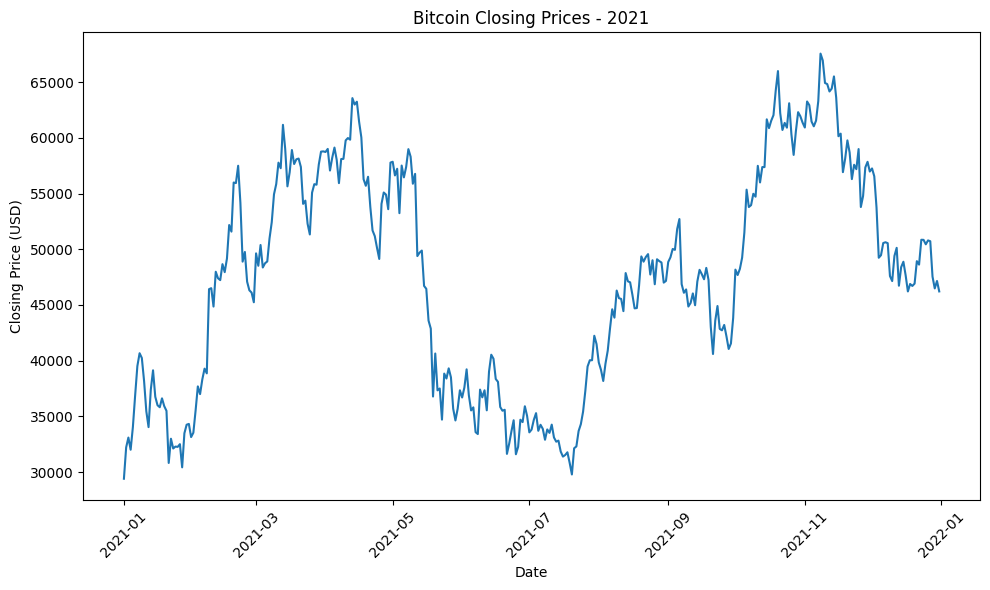

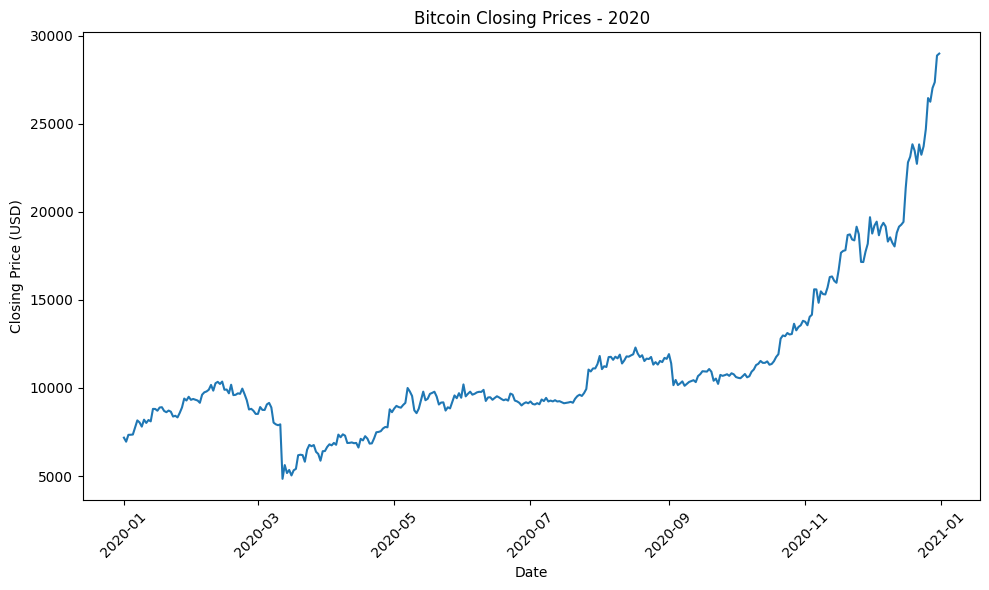

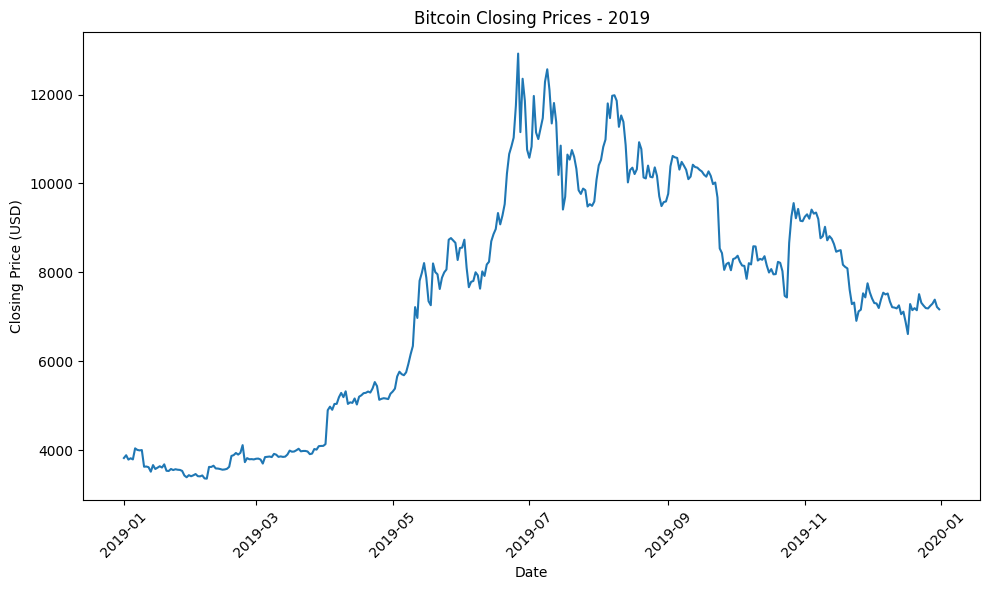

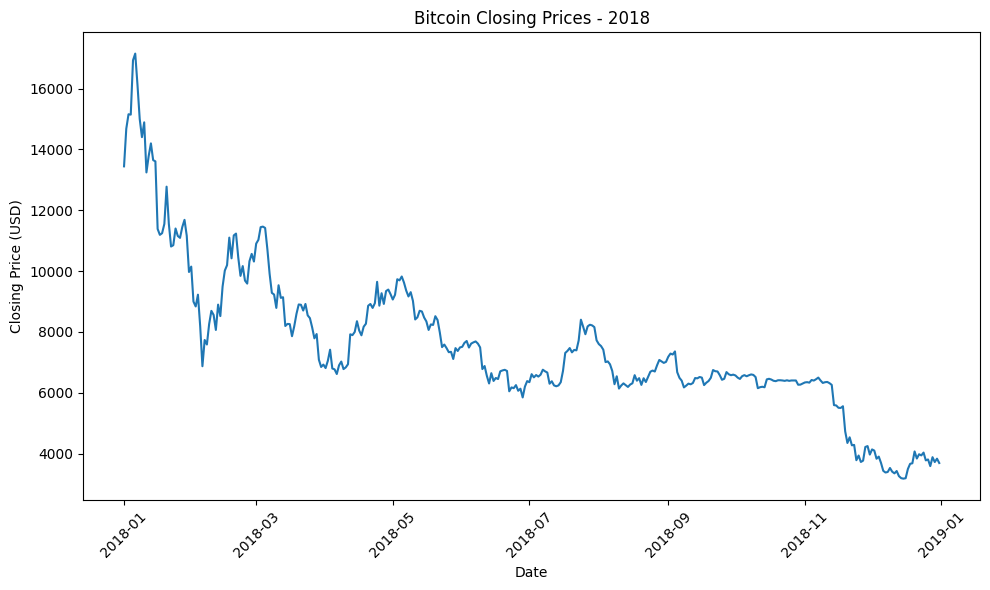

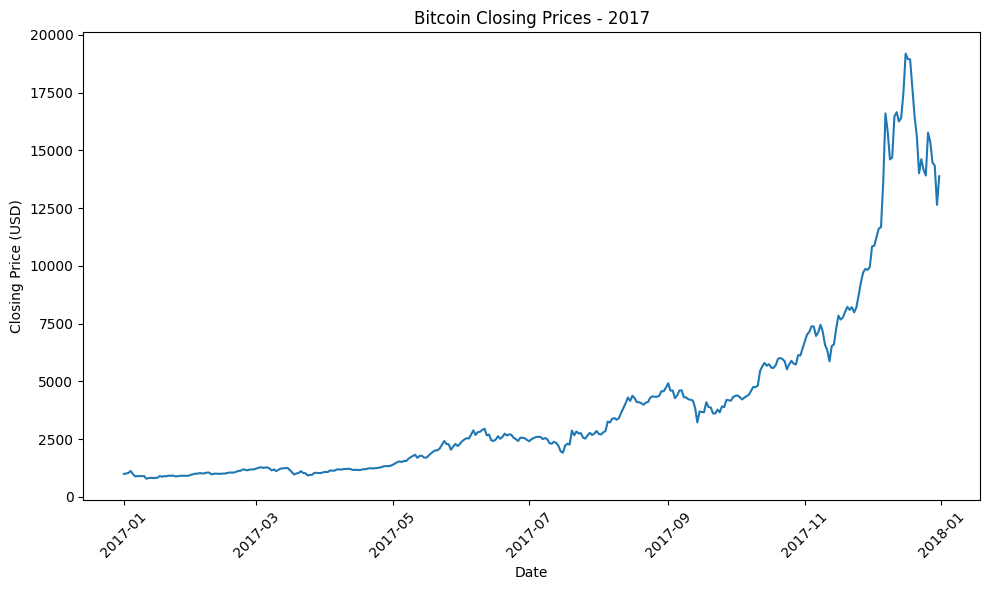

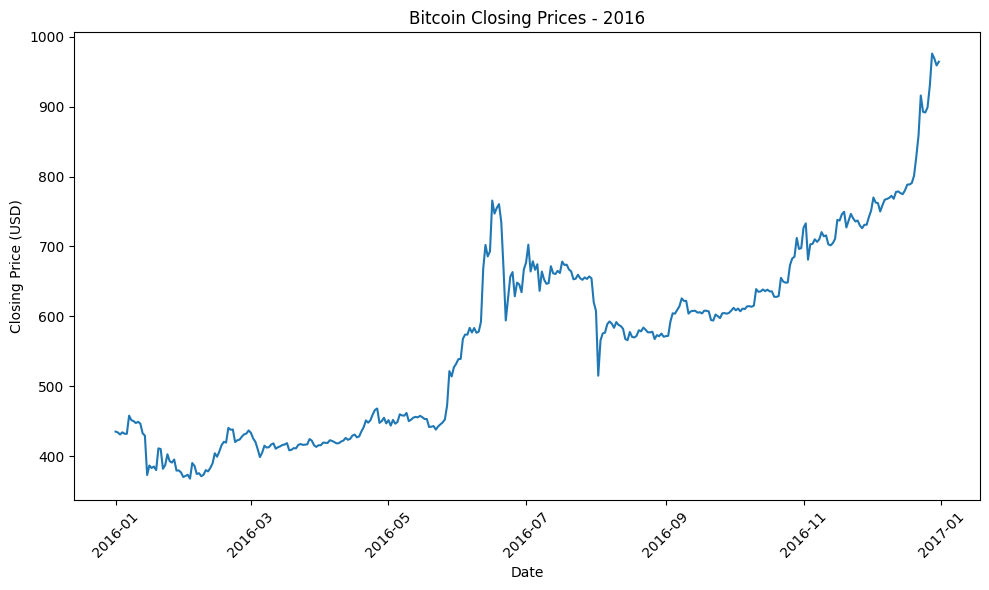

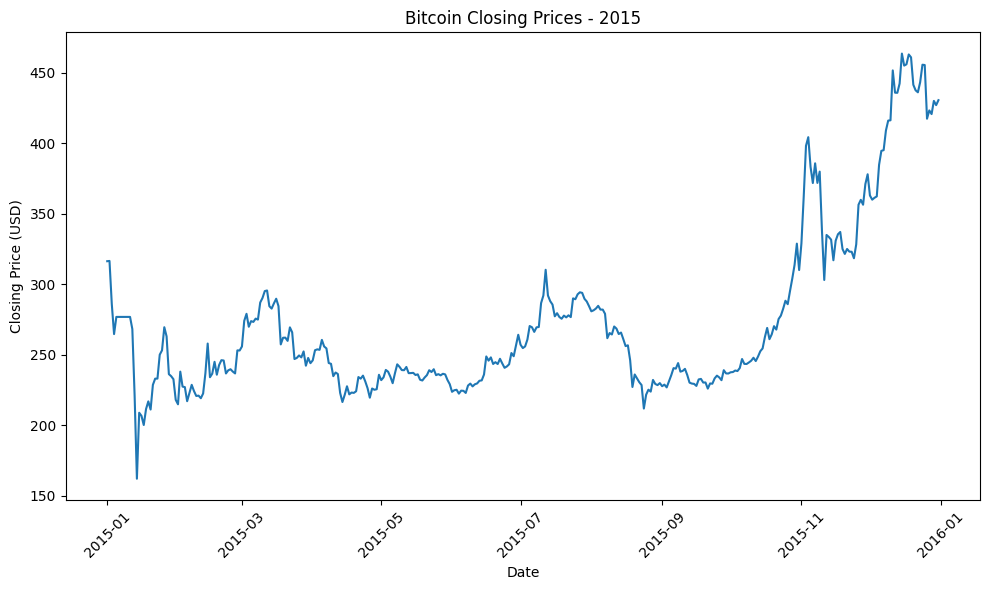

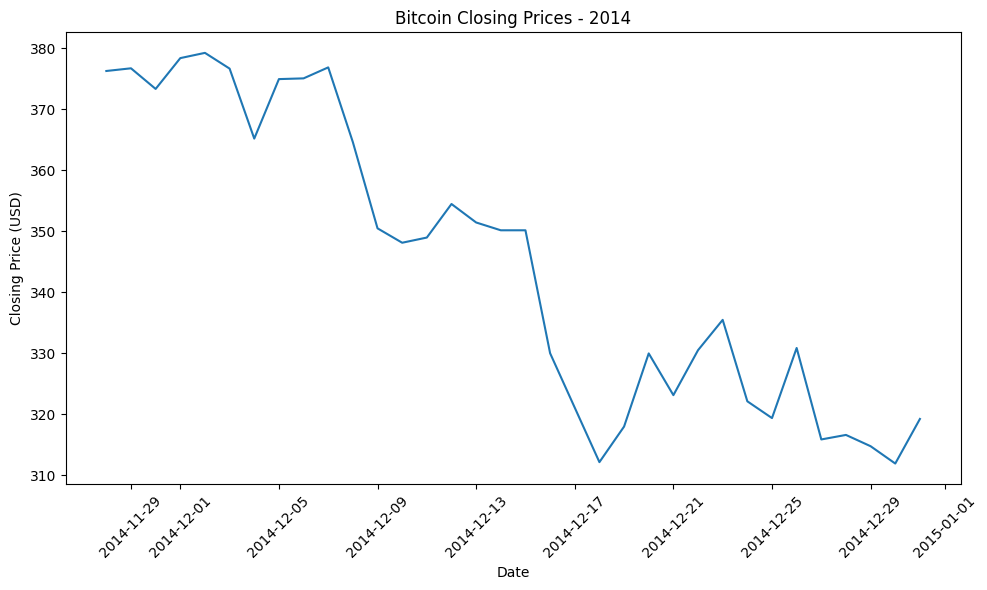

In [ ]:
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month
df["day"] = df["date"].dt.day


unique_years = df["year"].unique()
for year in unique_years:

    dates = pd.date_range(start=f"{year}-01-01", end=f"{year}-12-31", freq="D")
    year_month_day = pd.DataFrame({"date": dates})
    year_month_day["year"] = year_month_day["date"].dt.year
    year_month_day["month"] = year_month_day["date"].dt.month
    year_month_day["day"] = year_month_day["date"].dt.day


    merged_data = pd.merge(year_month_day, df, on=["year", "month", "day"], how="left")

    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(merged_data["date_x"], merged_data["close"])
    plt.title(f"Bitcoin Closing Prices - {year}")
    plt.xlabel("Date")
    plt.ylabel("Closing Price (USD)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

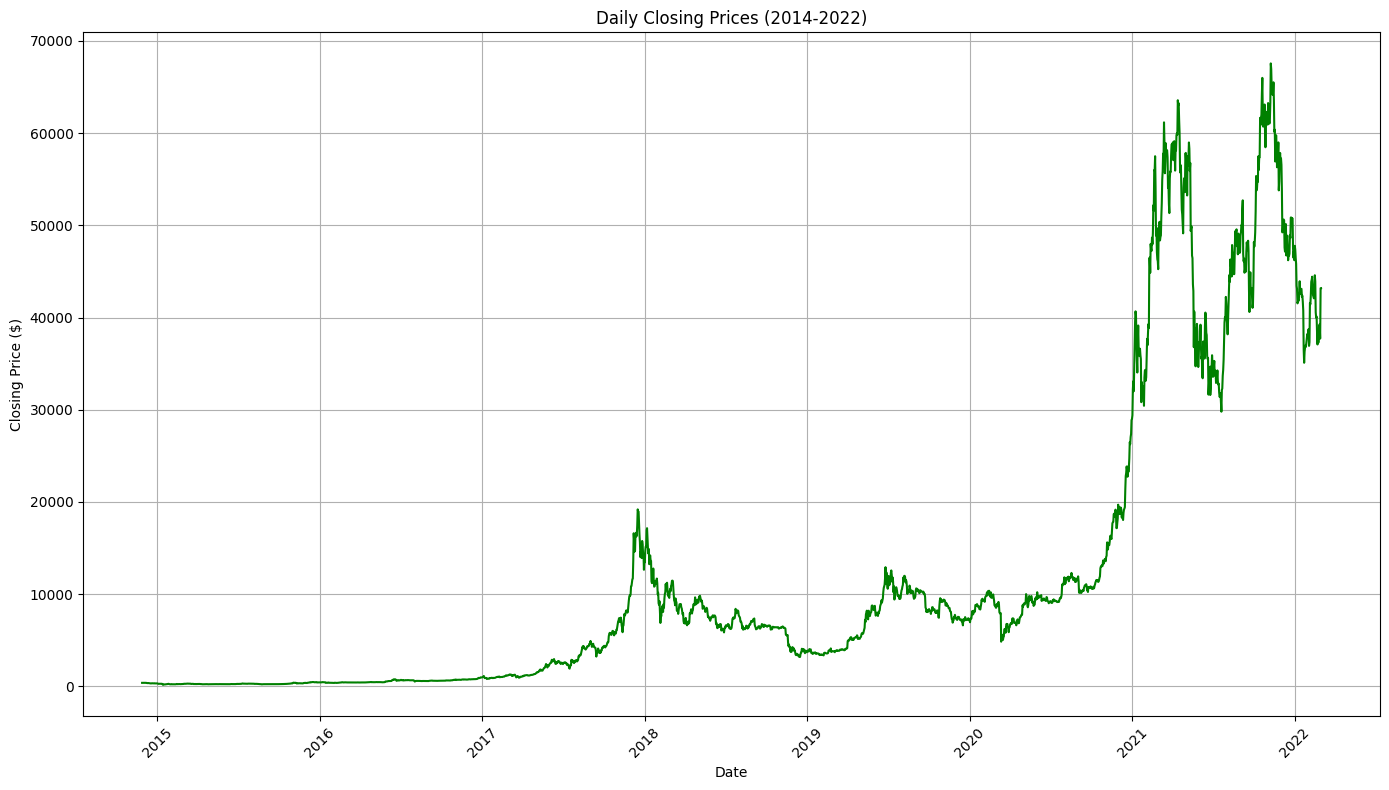

In [ ]:
plt.figure(figsize=(14, 8))
plt.plot(df["date"], df["close"], linestyle="-", color="g")
plt.title("Daily Closing Prices (2014-2022)")
plt.xlabel("Date")
plt.ylabel("Closing Price ($)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
!pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 3.2 MB/s eta 0:00:00


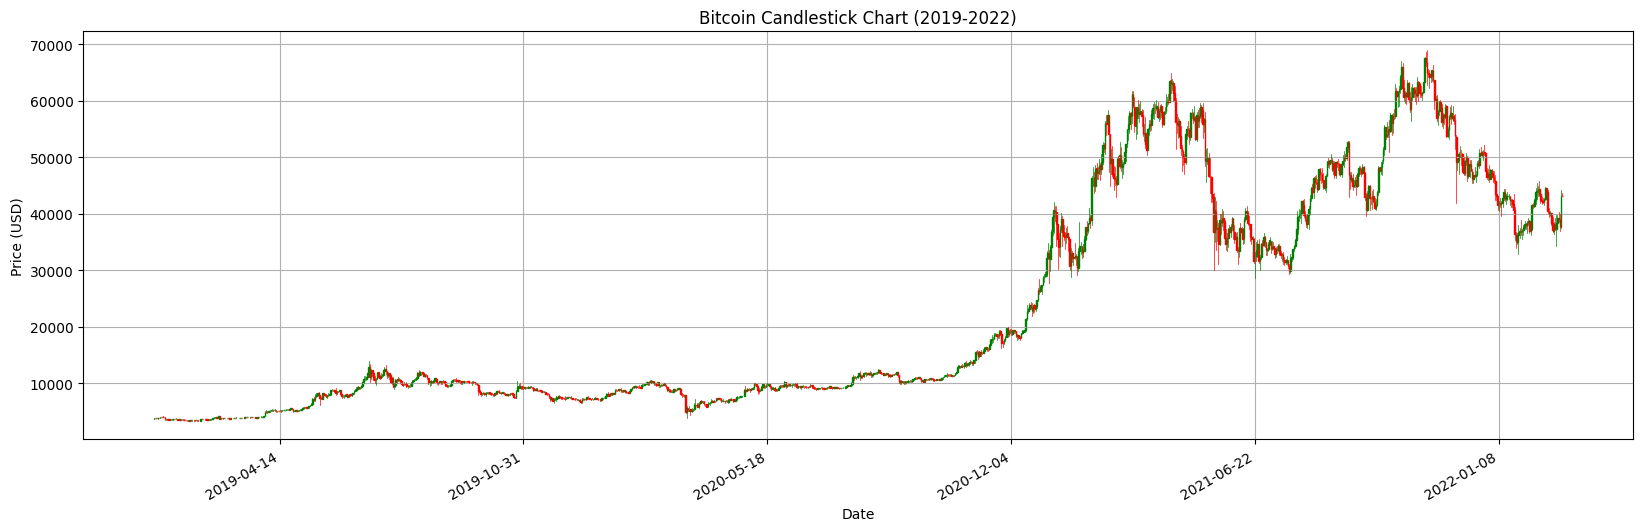

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from mplfinance.original_flavor import candlestick_ohlc
import datetime

# Filter data for 2019-2022
df_filtered = df[(df["date"] >= "2019-01-01") & (df["date"] <= "2022-12-31")]

# Convert date to matplotlib format
df_filtered = df[(df["date"] >= "2019-01-01") & (df["date"] <= "2022-12-31")].copy()
df_filtered["date"] = df_filtered["date"].map(mdates.date2num)


# Create the candlestick chart
fig, ax = plt.subplots(figsize=(20, 6))

candlestick_ohlc(ax, df_filtered[["date", "open", "high", "low", "close"]].values, width=0.6, colorup="g", colordown="r")

ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
fig.autofmt_xdate()

plt.title("Bitcoin Candlestick Chart (2019-2022)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.grid(True)

# Save the plot as a PDF
plt.savefig("bitcoin_candlestick_2019_2022.pdf")

plt.show()

## Checking for Null Values in dataset

In [ ]:
df.isnull().sum()

#As can be seen there are no NULL values in the data

,0
unix,0
date,0
symbol,0
open,0
high,0
low,0
close,0
Volume BTC,0
Volume USD,0
year,0


## Linear Regression Model

In [ ]:
def predict(X, w, b):
  ***Your code here***

def gradient(y_hat, y, x):
    ***Your code here***
    return (dw,db, cost)

def update_weight(w,b,lr,dw,db):
    ***Your code here***
    return (w_new, b_new)

In [ ]:
def linear_regression_vectorized(X, y, learning_rate=0.01, num_iterations=200):
  """
  Args:
    X: Feature matrix (numpy array).
    y: Target variable (numpy array).
    learning_rate: Learning rate for gradient descent.
    num_iterations: Number of iterations for gradient descent.

  Returns:
    w: Optimal weight vector.
    b: Optimal bias term.
  """
  n_samples, n_features = X.shape
  w = np.zeros(n_features)  # Initialize weights
  b = 0  # Initialize bias
  losses = []

  ***Your code here***

  return w, b, losses

## Data Normalization

---



In [ ]:
X = df[["open", "low", "high"]].values
y = df["close"].values

In [ ]:
X

array([[43221.71, 43185.48, 43626.49],
       [37717.1 , 37468.99, 44256.08],
       [39146.66, 37015.74, 39886.92],
       ...,
       [  376.57,   373.32,   381.99],
       [  376.42,   372.25,   386.6 ],
       [  363.59,   360.57,   381.34]])

In [ ]:
y

array([43185.48, 43178.98, 37712.68, ...,   373.34,   376.72,   376.28])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, shuffle=True
)

In [ ]:
X_train

array([[32737.56, 31589.35, 33111.72],
       [ 1176.54,  1175.95,  1210.  ],
       [ 9685.69,  7998.  ,  9782.  ],
       ...,
       [ 3560.94,  3536.51,  3657.89],
       [ 6194.3 ,  6186.02,  6628.5 ],
       [ 8021.57,  7293.55,  8052.04]])

In [ ]:
X_test

array([[  235.34,   234.87,   236.8 ],
       [46070.43, 45550.  , 47419.95],
       [ 6394.23,  6355.99,  6412.4 ],
       ...,
       [ 9725.57,  9602.6 , 10288.  ],
       [  221.51,   221.51,   229.67],
       [10093.39,  9855.11, 10243.01]])

In [ ]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)

In [ ]:
X_train_scaled

array([[ 1.2830691 ,  1.27996044,  1.24910085],
       [-0.64104726, -0.6387622 , -0.64176901],
       [-0.12228726, -0.20837224, -0.13369182],
       ...,
       [-0.49568241, -0.48983903, -0.49667836],
       [-0.33513972, -0.32268656, -0.32060519],
       [-0.22374028, -0.25281463, -0.23622953]])

In [ ]:
X_test_scaled

array([[-0.69842749, -0.69813311, -0.69945225],
       [ 2.09590701,  2.16071088,  2.09717427],
       [-0.322951  , -0.31196348, -0.33341381],
       ...,
       [-0.11985598, -0.10714113, -0.10370033],
       [-0.69927063, -0.69897597, -0.69987486],
       [-0.09743185, -0.09121076, -0.10636696]])

## **Training**

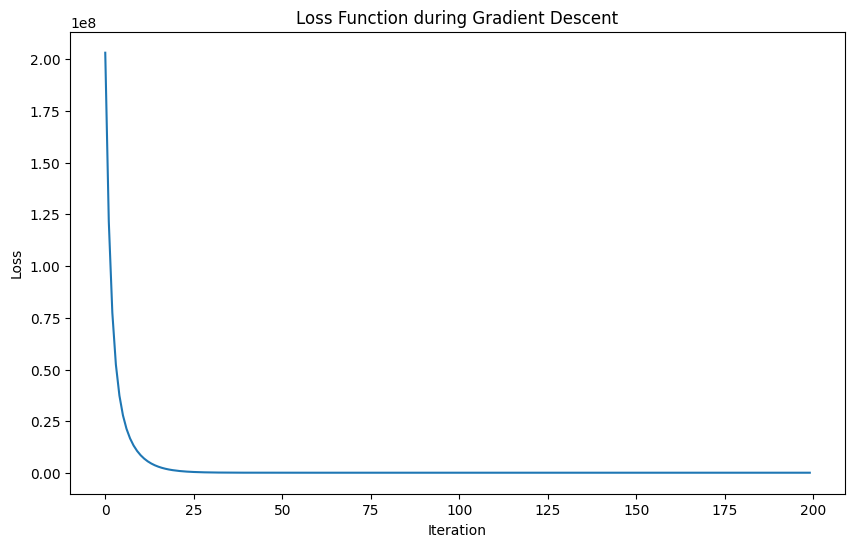

In [ ]:
w, b, losses = linear_regression_vectorized(
    X_train_scaled, y_train, learning_rate=0.1 , num_iterations=200
)

# Plot the loss function
plt.figure(figsize=(10, 6))
plt.plot(losses)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Loss Function during Gradient Descent")
plt.show()

Evaluating Linear Regression Model

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Make predictions on the test set
y_pred = predict(X_test_scaled, w, b)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Square Error (MSE):", round(mse, 4))
print("Mean Absolute Error (MAE):", round(mae, 4))
print("R-squared:", round(r2, 4))

Mean Square Error (MSE): 220447.341
Mean Absolute Error (MAE): 214.4811
R-squared: 0.9991


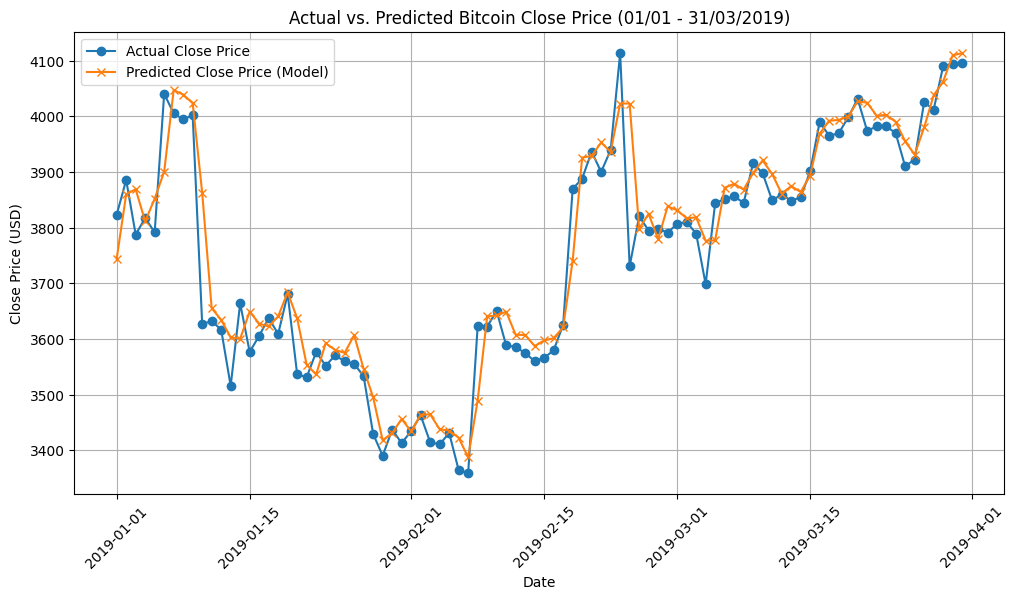

In [ ]:
# Lọc dữ liệu 2019 Q1
df_2019_Q1 = df[(df["date"] >= "2019-01-01") & (df["date"] <= "2019-03-31")].copy()

# Chọn đúng các cột feature đã train
X_2019 = df_2019_Q1[["open", "low", "high"]].values
X_2019_scaled = scalar.transform(X_2019)   # dùng scalar đã fit trước đó
y_2019 = df_2019_Q1["close"].values

# Dự đoán bằng mô hình
y_pred_2019 = predict(X_2019_scaled, w, b)

# Gắn vào dataframe để dễ vẽ
df_2019_Q1["predicted_close"] = y_pred_2019

# Vẽ biểu đồ
plt.figure(figsize=(12,6))
plt.plot(df_2019_Q1["date"], df_2019_Q1["close"], label="Actual Close Price", marker="o")
plt.plot(df_2019_Q1["date"], df_2019_Q1["predicted_close"], label="Predicted Close Price (Model)", marker="x")
plt.title("Actual vs. Predicted Bitcoin Close Price (01/01 - 31/03/2019)")
plt.xlabel("Date")
plt.ylabel("Close Price (USD)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


## Training using Sklearn

In [ ]:
from sklearn.linear_model import LinearRegression

linear_regressor = LinearRegression()
linear_regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
# Make predictions on the test set
y_pred = linear_regressor.predict(X_test_scaled)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Square Error (MSE):", round(mse, 4))
print("Mean Absolute Error (MAE):", round(mae, 4))
print("R-squared:", round(r2, 4))

Mean Square Error (MSE): 114200.2975
Mean Absolute Error (MAE): 143.9742
R-squared: 0.9996


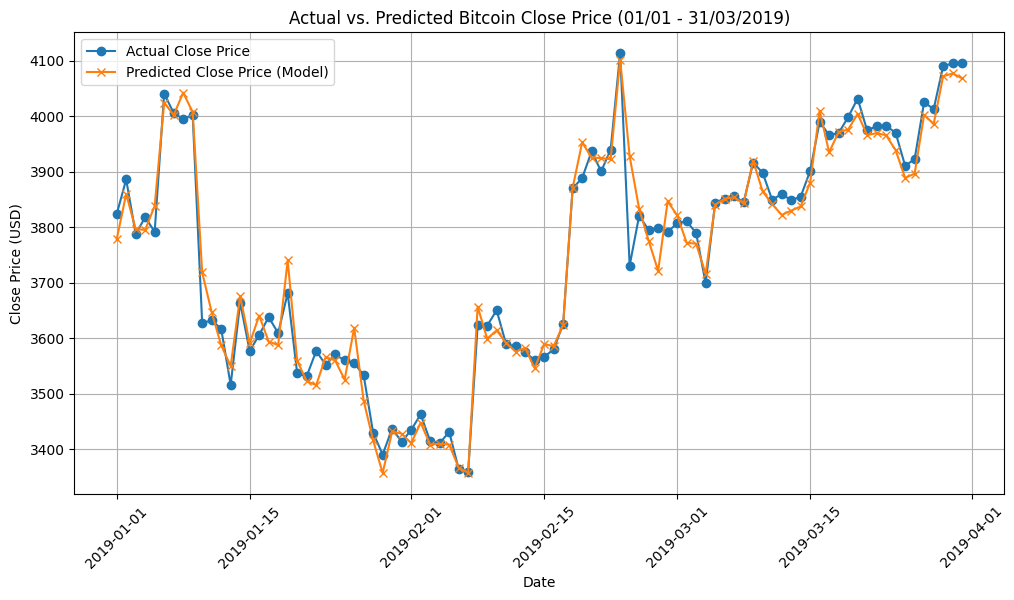

In [ ]:
# Lọc dữ liệu 2019 Q1
df_2019_Q1 = df[(df["date"] >= "2019-01-01") & (df["date"] <= "2019-03-31")].copy()

# Chọn đúng các cột feature đã train
X_2019 = df_2019_Q1[["open", "low", "high"]].values
X_2019_scaled = scalar.transform(X_2019)
y_2019 = df_2019_Q1["close"].values

# Dự đoán bằng model sklearn
y_pred_2019 = linear_regressor.predict(X_2019_scaled)

# Gắn vào dataframe để tiện vẽ
df_2019_Q1["predicted_close"] = y_pred_2019

# Vẽ
plt.figure(figsize=(12,6))
plt.plot(df_2019_Q1["date"], df_2019_Q1["close"], label="Actual Close Price", marker="o")
plt.plot(df_2019_Q1["date"], df_2019_Q1["predicted_close"], label="Predicted Close Price (Model)", marker="x")
plt.title("Actual vs. Predicted Bitcoin Close Price (01/01 - 31/03/2019)")
plt.xlabel("Date")
plt.ylabel("Close Price (USD)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

# Part 3: Advanced Techniques

## Cross-Validation

In [ ]:
from sklearn.model_selection import KFold, TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def cross_validate_model(X, y, learning_rate=0.01, num_iterations=200, n_splits=5):
    """
    Cross-validation cho Linear Regression
    """
    cv = KFold(n_splits=n_splits, shuffle=True, random_state=42)

    cv_scores = {
        'rmse': [], 'mae': [], 'r2': []
    }

    for fold, (train_idx, val_idx) in enumerate(cv.split(X), 1):
        X_train_cv, X_val_cv = X[train_idx], X[val_idx]
        y_train_cv, y_val_cv = y[train_idx], y[val_idx]

        # Train model
        w, b, _ = linear_regression_vectorized(X_train_cv, y_train_cv,
                                              learning_rate, num_iterations)

        # Validate
        y_pred_cv = predict(X_val_cv, w, b)

        # Metrics
        cv_scores['rmse'].append(np.sqrt(mean_squared_error(y_val_cv, y_pred_cv)))
        cv_scores['mae'].append(mean_absolute_error(y_val_cv, y_pred_cv))
        cv_scores['r2'].append(r2_score(y_val_cv, y_pred_cv))

        print(f"Fold {fold}: RMSE={cv_scores['rmse'][-1]:.4f}, "
              f"MAE={cv_scores['mae'][-1]:.4f}, R2={cv_scores['r2'][-1]:.4f}")

    # Average scores
    print(f"\nAverage CV Scores:")
    print(f"RMSE: {np.mean(cv_scores['rmse']):.4f} (+/- {np.std(cv_scores['rmse']):.4f})")
    print(f"MAE: {np.mean(cv_scores['mae']):.4f} (+/- {np.std(cv_scores['mae']):.4f})")
    print(f"R2: {np.mean(cv_scores['r2']):.4f} (+/- {np.std(cv_scores['r2']):.4f})")

    return cv_scores

# Áp dụng K-Fold CV
print("=== K-Fold Cross-Validation ===")
kfold_scores = cross_validate_model(X_train_scaled, y_train)

=== K-Fold Cross-Validation ===
Fold 1: RMSE=1759.9911, MAE=1654.2503, R2=0.9910
Fold 2: RMSE=1696.3324, MAE=1637.8134, R2=0.9883
Fold 3: RMSE=1624.9651, MAE=1550.2555, R2=0.9890
Fold 4: RMSE=1636.7026, MAE=1564.7794, R2=0.9899
Fold 5: RMSE=1628.1192, MAE=1570.5003, R2=0.9890

Average CV Scores:
RMSE: 1669.2221 (+/- 52.3061)
MAE: 1595.5198 (+/- 42.0900)
R2: 0.9894 (+/- 0.0009)


## Learing Rate

=== Testing Default Learning Rate ===
Fold 1: RMSE=1759.9911, MAE=1654.2503, R2=0.9910
Fold 2: RMSE=1696.3324, MAE=1637.8134, R2=0.9883
Fold 3: RMSE=1624.9651, MAE=1550.2555, R2=0.9890
Fold 4: RMSE=1636.7026, MAE=1564.7794, R2=0.9899
Fold 5: RMSE=1628.1192, MAE=1570.5003, R2=0.9890

Average CV Scores:
RMSE: 1669.2221 (+/- 52.3061)
MAE: 1595.5198 (+/- 42.0900)
R2: 0.9894 (+/- 0.0009)

Finding Best Learning Rate with Cross-Validation

Testing Learning Rate: 0.0001
------------------------------
Fold 1: RMSE=21044.1443, MAE=13397.6946, R2=-0.2862
Fold 2: RMSE=16973.9432, MAE=10373.5257, R2=-0.1747
Fold 3: RMSE=16939.0118, MAE=10543.9658, R2=-0.1941
Fold 4: RMSE=17825.4797, MAE=11005.4107, R2=-0.1963
Fold 5: RMSE=16903.2716, MAE=10416.3922, R2=-0.1830

Average CV Scores:
RMSE: 17937.1701 (+/- 1591.1528)
MAE: 11147.3978 (+/- 1147.2901)
R2: -0.2069 (+/- 0.0404)

Testing Learning Rate: 0.0021387755102040816
------------------------------
Fold 1: RMSE=4493.0142, MAE=4283.1550, R2=0.9414
Fold 2

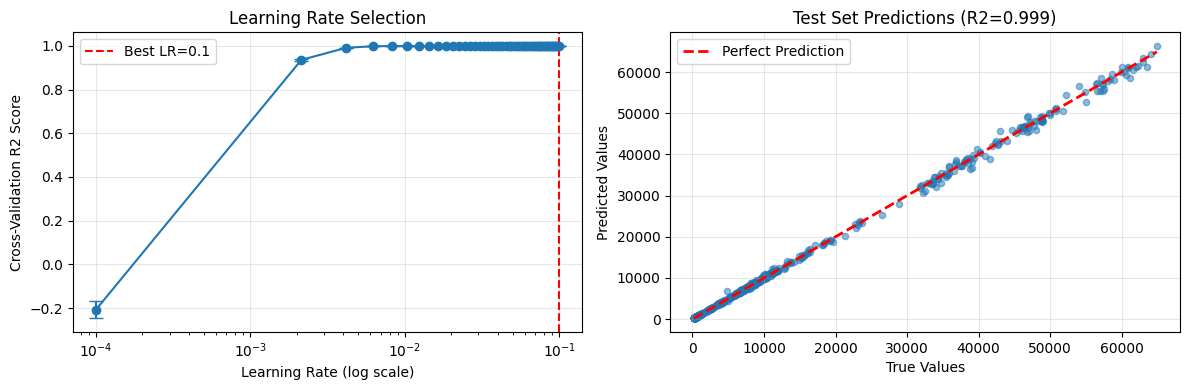

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def find_best_learning_rate(X, y, lr_candidates=None, num_iterations=200, n_splits=5):
    """
    Tìm learning rate tối ưu bằng Cross-Validation
    """
    if lr_candidates is None:
        lr_candidates = [0.001, 0.01, 0.1, 0.5, 1.0]

    best_lr = None
    best_score = -float('inf')
    results = {}

    print("="*50)
    print("Finding Best Learning Rate with Cross-Validation")
    print("="*50)

    for lr in lr_candidates:
        print(f"\nTesting Learning Rate: {lr}")
        print("-"*30)

        # Run CV cho learning rate này
        cv_scores = cross_validate_model(X, y, lr, num_iterations, n_splits)

        # Dùng R2 làm metric chính để so sánh
        mean_r2 = np.mean(cv_scores['r2'])
        results[lr] = {
            'mean_r2': mean_r2,
            'std_r2': np.std(cv_scores['r2']),
            'mean_rmse': np.mean(cv_scores['rmse'])
        }

        # Update best learning rate
        if mean_r2 > best_score:
            best_score = mean_r2
            best_lr = lr

    # Summary
    print("\n" + "="*50)
    print("SUMMARY - Learning Rate Comparison")
    print("="*50)
    for lr, scores in results.items():
        print(f"LR={lr:6.4f}: R2={scores['mean_r2']:.4f} (+/- {scores['std_r2']:.4f}), "
              f"RMSE={scores['mean_rmse']:.4f}")

    print(f"\n🏆 Best Learning Rate: {best_lr}")
    print(f"   Best R2 Score: {results[best_lr]['mean_r2']:.4f}")

    return best_lr, results

# Sử dụng:
# 1. Test với learning rate mặc định
print("=== Testing Default Learning Rate ===")
kfold_scores = cross_validate_model(X_train_scaled, y_train, learning_rate=0.01)

# 2. Tìm best learning rate
print("\n" + "="*60)
best_lr, lr_results = find_best_learning_rate(
    X_train_scaled,
    y_train,
    lr_candidates=np.linspace(0.0001, 0.1, 50),
    num_iterations=500
)

# 3. Train final model với best learning rate
print(f"\n=== Training Final Model with Best LR={best_lr} ===")
w_final, b_final, costs_final = linear_regression_vectorized(
    X_train_scaled, y_train,
    learning_rate=best_lr,
    num_iterations=500
)

# Evaluate on test set
y_pred_test = predict(X_test_scaled, w_final, b_final)
test_r2 = r2_score(y_test, y_pred_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

print(f"Test Set Performance:")
print(f"  R2 Score: {test_r2:.4f}")
print(f"  RMSE: {test_rmse:.4f}")

# Optional: Visualize results
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plot 1: Learning Rate vs R2 Score
lrs = list(lr_results.keys())
mean_r2s = [lr_results[lr]['mean_r2'] for lr in lrs]
std_r2s = [lr_results[lr]['std_r2'] for lr in lrs]

ax1.errorbar(lrs, mean_r2s, yerr=std_r2s, marker='o', capsize=5)
ax1.axvline(x=best_lr, color='r', linestyle='--', label=f'Best LR={best_lr}')
ax1.set_xscale('log')
ax1.set_xlabel('Learning Rate (log scale)')
ax1.set_ylabel('Cross-Validation R2 Score')
ax1.set_title('Learning Rate Selection')
ax1.grid(True, alpha=0.3)
ax1.legend()

# Plot 2: Predictions vs Actual
ax2.scatter(y_test, y_pred_test, alpha=0.5, s=20)
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         'r--', lw=2, label='Perfect Prediction')
ax2.set_xlabel('True Values')
ax2.set_ylabel('Predicted Values')
ax2.set_title(f'Test Set Predictions (R2={test_r2:.3f})')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()